In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform


In [11]:
fic_epita_kantar_codes = pd.read_csv('data/fic_epita_kantar_codes.csv', sep=';')
fic_epita_kantar_codes

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,NaN,...,2,4,1,2,NaN,1,1,24,0,4
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,NaN,...,2,1,1,2,NaN,4,1,50,0,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,NaN,...,2,3,2,1,NaN,3,2,37,1,3
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,NaN,...,2,2,1,2,NaN,5,3,63,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,NaN,1.0,...,2,3,2,1,NaN,3,1,44,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,1,0,1,0,3,NaN,1.0,...,2,2,1,2,NaN,6,3,69,0,2
4996,4997,MET20_80000348,1.257884,0,1,0,0,2,NaN,1.0,...,2,1,1,2,NaN,4,3,53,0,1
4997,4998,MET20_288029,1.094695,0,1,0,0,2,NaN,2.0,...,1,2,1,2,2.0,6,3,75,0,2
4998,4999,MET20_1235808,2.022023,0,0,1,0,3,NaN,1.0,...,2,3,2,1,NaN,2,3,33,1,3


In [12]:
from utils.utils import select_features

columns = ['A11', 'A12', 'A13', 'A14', 'A4', 'A5', 'A5bis', 
           'A8_1_slice', 'A8_2_slice', 'A8_3_slice', 'A8_4_slice', 
           'B1_1_slice', 'B1_2_slice', 'B2_1_slice', 'B2_2_slice', 
           'B3', 'B4', 'B6', 
           'C1_1_slice', 'C1_2_slice', 'C1_3_slice', 'C1_4_slice', 
           'C1_5_slice', 'C1_6_slice', 'C1_7_slice', 'C1_8_slice', 
           'C1_9_slice']

# On remplace les valeurs manquantes par 0 (car les valeurs manquantes sont des valeurs non cochées)
fic_epita_kantar_codes[columns] = fic_epita_kantar_codes[columns].fillna(0)

# On ne garde que les colonnes qui nous intéressent
fic_epita_kantar_codes = fic_epita_kantar_codes[['cle', 'Respondent_ID', 'weight'] + columns]
fic_epita_kantar_codes

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,0.0,...,3,2,2,2,2,2,2,2,2,2
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,0.0,...,3,4,4,4,4,4,4,4,4,4
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,0.0,...,4,4,4,4,4,4,4,4,4,4
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,0.0,...,4,4,4,5,5,5,5,5,4,4
4,5,MET20_1869308,0.812315,0,1,0,0,2,0.0,1.0,...,3,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,1,0,1,0,3,0.0,1.0,...,4,4,4,5,5,5,5,5,4,5
4996,4997,MET20_80000348,1.257884,0,1,0,0,2,0.0,1.0,...,2,4,5,5,5,5,5,5,5,5
4997,4998,MET20_288029,1.094695,0,1,0,0,2,0.0,2.0,...,4,5,5,5,5,5,5,5,5,5
4998,4999,MET20_1235808,2.022023,0,0,1,0,3,0.0,1.0,...,3,5,4,5,5,5,5,5,5,5


## Choix du nombre de groupes

In [13]:
# Combine these columns into a feature space
features = select_features(fic_epita_kantar_codes, columns)
features = features.values
features

array([[1., 0., 0., ..., 2., 2., 2.],
       [1., 0., 0., ..., 4., 4., 4.],
       [1., 0., 0., ..., 4., 4., 4.],
       ...,
       [0., 1., 0., ..., 5., 5., 5.],
       [0., 0., 1., ..., 5., 5., 5.],
       [1., 0., 1., ..., 4., 4., 4.]])

In [14]:
weights = fic_epita_kantar_codes['weight'].values

len(weights)

5000

In [15]:
# Standardize the feature space
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled[0]

array([ 0.5282987 , -0.53881591, -0.82024403,  0.        , -0.59044293,
        0.23203143, -0.53584005, -0.46341365, -0.50303075, -0.32423321,
        0.28822185, -1.44437989, -1.86252746, -1.6036921 , -1.94075996,
       -1.59714356, -1.00252076, -0.30730537, -2.50272955, -2.37447773,
       -3.29875454, -3.3314527 , -2.81924299, -3.69124522, -3.22105496,
       -2.84170351, -2.76961126])

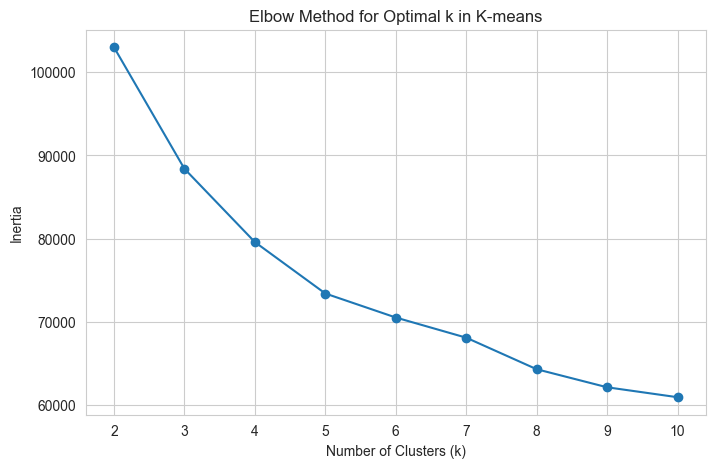

In [16]:
inertia = []
k_range = range(2, 11)  # Essayer de 1 à 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled, sample_weight=weights)
    inertia.append(kmeans.inertia_)

# Affichage du graphique de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k in K-means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.show()

In [17]:
from utils.utils import weighted_distance_matrix

weighted_distances = weighted_distance_matrix(features_scaled, weights)

# Conversion en format condensé pour linkage
condensed_weighted_distances = squareform(weighted_distances)

# Clustering hiérarchique avec la matrice de distances pondérées
Z = linkage(condensed_weighted_distances, method='ward')
Z

100%|██████████| 5000/5000 [01:14<00:00, 67.29it/s] 


array([[3.16000000e+02, 4.47700000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.31100000e+03, 2.81800000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.32500000e+03, 2.74100000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.99100000e+03, 9.99500000e+03, 1.28061460e+02, 3.59200000e+03],
       [9.99400000e+03, 9.99600000e+03, 1.69276046e+02, 4.78700000e+03],
       [9.99300000e+03, 9.99700000e+03, 2.11887485e+02, 5.00000000e+03]])

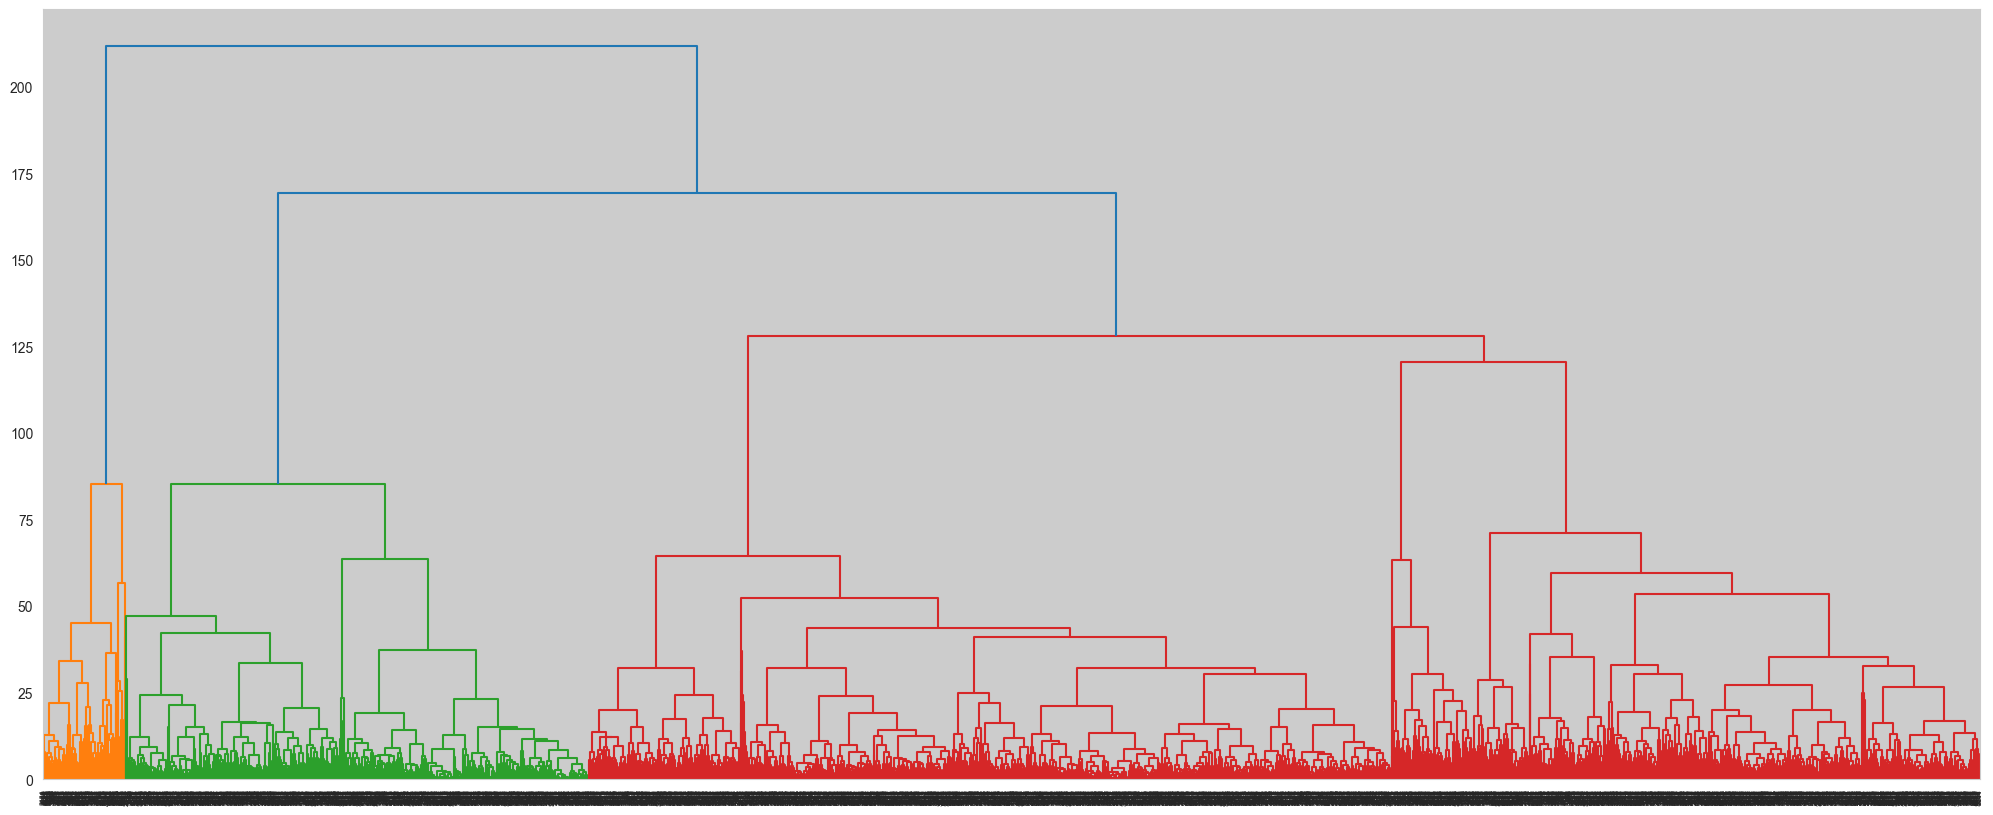

In [18]:
plt.figure(figsize=(25, 10))
dendrogram(Z, orientation='top')
plt.show()

## K-means clustering

In [19]:
# On choisit 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features_scaled, sample_weight=weights)

# Ajout des labels dans le dataframe
fic_epita_kantar_codes['cluster'] = kmeans.labels_
fic_epita_kantar_codes

C:\Users\jujus\AppData\Local\Temp\ipykernel_12180\2367626429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fic_epita_kantar_codes['cluster'] = kmeans.labels_


,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,cluster
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,0.0,...,2,2,2,2,2,2,2,2,2,3
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,0.0,...,4,4,4,4,4,4,4,4,4,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,0.0,...,4,4,4,4,4,4,4,4,4,1
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,0.0,...,4,4,5,5,5,5,5,4,4,4
4,5,MET20_1869308,0.812315,0,1,0,0,2,0.0,1.0,...,4,4,4,4,4,4,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,1,0,1,0,3,0.0,1.0,...,4,4,5,5,5,5,5,4,5,2
4996,4997,MET20_80000348,1.257884,0,1,0,0,2,0.0,1.0,...,4,5,5,5,5,5,5,5,5,2
4997,4998,MET20_288029,1.094695,0,1,0,0,2,0.0,2.0,...,5,5,5,5,5,5,5,5,5,2
4998,4999,MET20_1235808,2.022023,0,0,1,0,3,0.0,1.0,...,5,4,5,5,5,5,5,5,5,2


In [20]:
# On regarde la répartition des clusters
fic_epita_kantar_codes['cluster'].value_counts()

cluster
4    1890
1    1216
2    1203
0     366
3     325
Name: count, dtype: int64

In [21]:
# On regarde les moyennes des features par cluster
cluster_means = fic_epita_kantar_codes.groupby('cluster').mean(numeric_only=True)
cluster_means

,cle,weight,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,...,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice
cluster,,,,,,,,,,,,,,,,,,,,,
0,2424.956284,0.976391,0.975410,0.112022,0.442623,0.0,1.046448,2.784153,0.060109,22.199454,...,3.000000,4.125683,4.122951,4.603825,4.713115,4.551913,4.830601,4.642077,4.308743,4.316940
1,2500.937500,0.969777,0.955592,0.120066,0.449013,0.0,1.152138,2.141447,0.180099,5.065789,...,2.952303,3.675987,3.654605,4.249178,4.395559,4.185033,4.564145,4.221217,3.909539,3.894737
2,2508.870324,0.974658,0.206983,0.600998,0.460515,0.0,2.442228,0.000000,1.788030,1.881962,...,3.425603,4.522028,4.458022,4.801330,4.847880,4.745636,4.874480,4.807149,4.658354,4.663342
3,2456.923077,1.025130,0.772308,0.283077,0.556923,0.0,1.523077,1.523077,0.723077,6.135385,...,2.190769,2.400000,2.393846,2.603077,2.550769,2.449231,2.633846,2.535385,2.455385,2.473846
4,2517.013228,0.952194,1.000000,0.065079,0.300529,0.0,1.000529,2.199471,0.000529,3.739683,...,3.610582,4.635979,4.530159,4.909524,4.941799,4.870370,4.959259,4.902646,4.735450,4.778836


In [22]:
# On regarde les variances intra-cluster
cluster_vars = fic_epita_kantar_codes.groupby('cluster').var(numeric_only=True)
cluster_vars

,cle,weight,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,...,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice
cluster,,,,,,,,,,,,,,,,,,,,,
0,2.000758e+06,0.117689,0.024051,0.099745,0.247384,0.0,0.071809,2.005337,0.138843,101.710794,...,0.898630,0.641695,0.650595,0.371383,0.396923,0.702777,0.195883,0.394827,0.493458,0.595164
1,2.022900e+06,0.157646,0.042471,0.105737,0.247604,0.0,0.244325,1.882857,0.399637,17.692788,...,0.787847,0.428262,0.484720,0.416049,0.502663,0.710591,0.343207,0.445673,0.378641,0.469569
2,2.101563e+06,0.231742,0.164277,0.239999,0.248648,0.0,0.246868,0.000000,0.965847,4.882894,...,0.612389,0.377842,0.449775,0.189283,0.167356,0.302966,0.141470,0.184075,0.278356,0.296717
3,2.421609e+06,0.258975,0.176391,0.203571,0.247521,0.0,0.608262,2.176163,1.349003,50.259392,...,0.778310,0.709877,0.708604,0.869744,0.846952,0.896334,0.942678,0.780380,0.668528,0.682184
4,2.072303e+06,0.183080,0.000000,0.060876,0.210323,0.0,0.000529,1.436633,0.000529,12.106895,...,0.413652,0.278218,0.394273,0.092921,0.070724,0.166882,0.051807,0.097452,0.207372,0.200928


In [23]:
# On regarde les variances inter-cluster
inter_cluster_vars = cluster_means.var()
inter_cluster_vars

cle           1547.267283
weight           0.000739
A11              0.111451
A12              0.048366
A13              0.008403
A14              0.000000
A4               0.360498
A5               1.134162
A5bis            0.560353
A8_1_slice      67.275092
A8_2_slice      61.188291
A8_3_slice      46.883749
A8_4_slice       6.305885
B1_1_slice       0.341883
B1_2_slice       0.301738
B2_1_slice       0.345191
B2_2_slice       0.300345
B3               0.283764
B4               0.385931
B6               0.301163
C1_1_slice       0.818940
C1_2_slice       0.765934
C1_3_slice       0.893776
C1_4_slice       0.987791
C1_5_slice       0.982137
C1_6_slice       0.966443
C1_7_slice       0.956703
C1_8_slice       0.865687
C1_9_slice       0.871006
dtype: float64

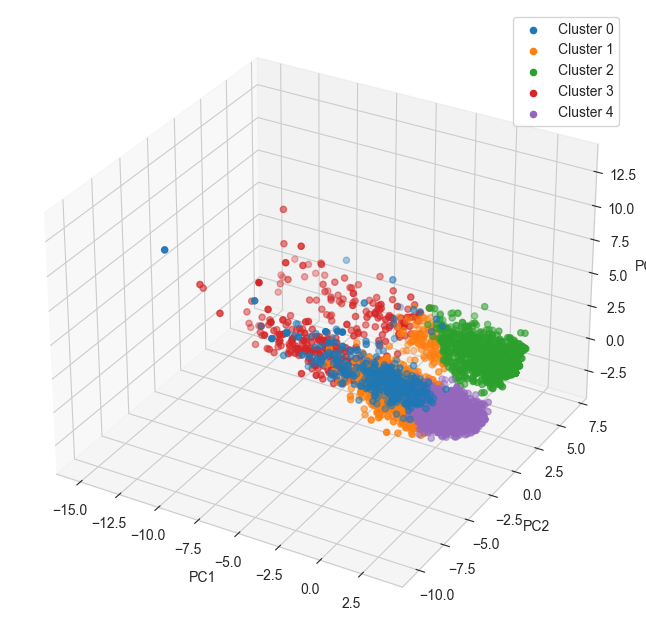

In [24]:
# Représentation en 3D dans l'espace des composantes principales
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(5):
    cluster_indices = fic_epita_kantar_codes[fic_epita_kantar_codes['cluster'] == cluster].index
    ax.scatter(features_pca[cluster_indices, 0], features_pca[cluster_indices, 1], features_pca[cluster_indices, 2], label=f'Cluster {cluster}')
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [25]:
components = pd.DataFrame(pca.components_, columns=columns, index=['PC1', 'PC2', 'PC3'])

# Afficher les coefficients
display(components)

# Trouver les 3 features les plus importantes pour chaque composante
top_features_per_pc = components.apply(lambda row: row.abs().nlargest(3).index.tolist(), axis=1)

# Affichage des résultats
for pc, features in top_features_per_pc.items():
    print(f"{pc}: {', '.join(features)}")


,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,...,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice
PC1,-0.079404,0.038503,-0.049795,-0.000000e+00,0.052532,-0.068064,0.036739,-0.101897,-0.109940,-0.094142,...,0.183877,0.279978,0.264648,0.283264,0.271812,0.256499,0.264813,0.284910,0.288260,0.285103
PC2,-0.334317,0.227057,0.051469,-1.110223e-16,0.360576,-0.344176,0.340320,-0.318749,-0.299544,-0.309375,...,-0.014533,-0.074502,-0.069751,-0.110194,-0.121646,-0.107099,-0.138126,-0.107919,-0.081275,-0.087860
PC3,-0.274346,0.206842,0.114947,2.220446e-16,0.302840,-0.192164,0.297645,0.360169,0.344422,0.379904,...,-0.102284,-0.028192,-0.008861,-0.003915,0.005214,-0.005001,0.024623,0.005069,-0.013567,-0.029020


PC1: C1_8_slice, C1_9_slice, C1_7_slice
PC2: A4, A5, A5bis
PC3: A8_3_slice, A8_4_slice, A8_1_slice


In [26]:
# Distribution des features principales par cluster
important_features = ['C1_8_slice', 'C1_9_slice', 'C1_7_slice']  # Exemple
cluster_analysis = fic_epita_kantar_codes.groupby('cluster')[important_features].mean(numeric_only=True)

display(cluster_analysis)

,C1_8_slice,C1_9_slice,C1_7_slice
cluster,,,
0,4.308743,4.316940,4.642077
1,3.909539,3.894737,4.221217
2,4.658354,4.663342,4.807149
3,2.455385,2.473846,2.535385
4,4.735450,4.778836,4.902646


In [27]:
# Distribution des features principales par cluster
important_features = ['A4', 'A5', 'A5bis']  # Exemple
cluster_analysis = fic_epita_kantar_codes.groupby('cluster')[important_features].mean(numeric_only=True)

display(cluster_analysis)

,A4,A5,A5bis
cluster,,,
0,1.046448,2.784153,0.060109
1,1.152138,2.141447,0.180099
2,2.442228,0.000000,1.788030
3,1.523077,1.523077,0.723077
4,1.000529,2.199471,0.000529


In [28]:
# Distribution des features principales par cluster
important_features = ['A8_3_slice', 'A8_4_slice', 'A8_1_slice']  # Exemple
cluster_analysis = fic_epita_kantar_codes.groupby('cluster')[important_features].mean(numeric_only=True)

display(cluster_analysis)

,A8_3_slice,A8_4_slice,A8_1_slice
cluster,,,
0,18.095628,6.557377,22.199454
1,3.431743,1.033717,5.065789
2,1.428096,0.615129,1.881962
3,4.418462,1.803077,6.135385
4,2.648677,0.708995,3.739683
